In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

def get_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    if width == 'log':
        width_pt = 397.48499
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'two-column':
        width_pt = 234.8775
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
get_size('log', fraction=1)

(5.499999861629998, 3.399186852607058)

In [4]:
dcr_study_original = pd.read_csv("../experiments/ablation_study_dcr.csv")

In [5]:
print(dcr_study_original.columns)
dcr_study = dcr_study_original[[
    'experiment',
    'dataset',
    'fold',
    'test_accuracy',
    'aggregation_mode',
    'nonlinearity',
    'concept_embedding_size',
    'layer_type',
    'entropy_loss_scaling'
]]

filter = dcr_study['entropy_loss_scaling'] != 'False' # Just one data point
dcr_study = dcr_study[filter]

# print(dcr_study[dcr_study['']])
print(dcr_study['dataset'].unique())


Index(['experiment', 'start_time', 'dataset', 'fold', 'test_accuracy',
       'test_accuracy_dt', 'test_accuracy_dt_pruned', 'test_accuracy_cm',
       'data_dir', 'temperature', 'layer_type', 'aggregation_mode',
       'nonlinearity', 'evaluation_nonlinearity', 'concept_embedding_size',
       'concept_temperature', 'a', 'dropout', 'use_batch_norm', 'hidden_units',
       'state_size', 'num_layers', 'skip_connection', 'bounding_parameter',
       'batch_size', 'device', 'train_decision_tree', 'max_leaf_nodes',
       'learning_rate', 'max_epochs', 'num_cv', 'entropy_loss_scaling',
       'early_stopping', 'loss_mode', 'num_recurrent_iterations',
       'teacher_max_epochs', 'train_concept_model', 'student_layer_type',
       'student_aggregation_mode', 'concept_memory_disjunctions'],
      dtype='object')
['Simple_Saturation' 'Saturation' 'Infection']


In [6]:
palette = 'tab10'

/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_4047/2406108162.py:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  plot = sns.barplot(data=dcr_study, x='Dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


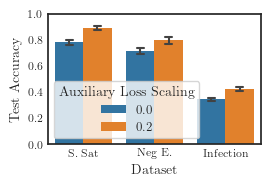

In [ ]:
simple_sat = dcr_study[dcr_study['dataset'] == 'Simple_Saturation']
sat = dcr_study[dcr_study['dataset'] == 'Saturation']
infection = dcr_study[dcr_study['dataset'] == 'Infection']

dcr_study['Dataset'] = dcr_study['dataset'].replace({
    'Simple_Saturation': 'S. E.',
    'Saturation': 'Neg E.',
    'Infection': 'Infection'
})

plt.figure(figsize=get_size('log', fraction=0.5))
plot = sns.barplot(data=dcr_study, x='Dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)
plot.set(ylim=(0, 1.0))
#plot.set_title('DCR Ablation Study')
plot.set_xlabel('Dataset')
plot.set_ylabel('Test Accuracy')

plt.legend(title='Auxiliary Loss Scaling', loc='lower left', frameon=True)
plt.savefig('dcr_loss_scaling.pdf', bbox_inches='tight')


In [22]:
cmr_study_original = pd.read_csv("../experiments/ablation_study_cmr.csv")

In [ ]:
cmr_study = cmr_study_original[[
    'experiment',
    'dataset',
    'fold',
    'test_accuracy',
    'aggregation_mode',
    'nonlinearity',
    'concept_embedding_size',
    'layer_type',
    'entropy_loss_scaling'
]]

cmr_study['Dataset'] = cmr_study['dataset'].replace({
    'Simple_Saturation': 'S. E.',
    'Saturation': 'Neg E.',
    'Infection': 'Infection'
})
# filter = dcr_study['entropy_loss_scaling'] != 'False' # Just one data point
# dcr_study = dcr_study[filter]

# print(dcr_study[dcr_study['']])
print(cmr_study['dataset'].unique())


['Simple_Saturation' 'Saturation' 'Infection']


/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_4047/2163053858.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmr_study['Dataset'] = cmr_study['dataset'].replace({


/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_4047/1091015467.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  plot = sns.barplot(data=cmr_study, x='Dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


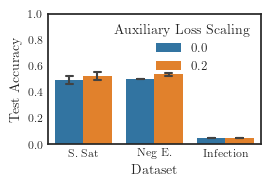

In [29]:
plt.figure(figsize=get_size('log', fraction=0.5))
plot = sns.barplot(data=cmr_study, x='Dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)
plot.set_ylim(0, 1.0)
plot.set_ylabel("Test Accuracy")
plot.set_xlabel("Dataset")

plot.legend(title='Auxiliary Loss Scaling', loc='upper right')
plt.savefig('cmr_loss_scaling.pdf', bbox_inches='tight')


/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_4047/2988440562.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(data=dcr_study, x='Dataset', y='test_accuracy', hue='Aggregation', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


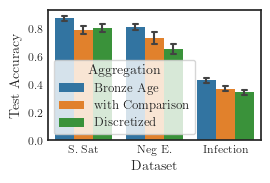

In [32]:
plt.figure(figsize=get_size('log', fraction=0.5))
dcr_study['Aggregation'] = dcr_study['aggregation_mode'].map({
    'bronze_age': 'Bronze Age',
    'bronze_age_comparison': 'with Comparison',
    'bronze_age_rounded': 'Discretized',
})
ax = sns.barplot(data=dcr_study, x='Dataset', y='test_accuracy', hue='Aggregation', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)
sns.move_legend(ax, "lower left", frameon=True)
plt.xlabel('Dataset')
plt.ylabel('Test Accuracy')

plt.savefig('dcr_aggregation.pdf', bbox_inches='tight')


Apparently the embedding size experiments didn't go as expected...

<Axes: xlabel='dataset', ylabel='test_accuracy'>

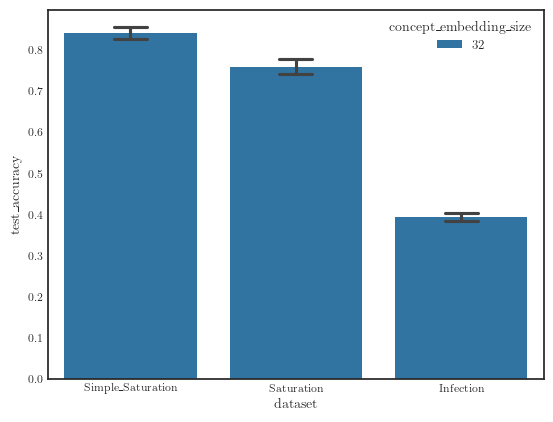

In [12]:
sns.barplot(data=dcr_study, x='dataset', y='test_accuracy', hue='concept_embedding_size', palette=palette, capsize=0.2, errorbar="se")

/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_4047/1034177329.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  plot = sns.barplot(data=dcr_study, x='Dataset', y='test_accuracy', hue='Nonlinearity', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)


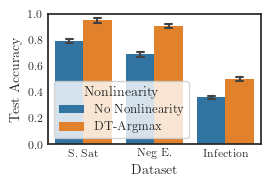

In [35]:
dcr_study['nonlinearity'] = dcr_study['nonlinearity'].fillna('none')
dcr_study['Nonlinearity'] = dcr_study['nonlinearity'].map({
    'none': 'No Nonlinearity',
    'differentiable_argmax': 'DT-Argmax',
})
plt.figure(figsize=get_size('log', fraction=0.5))
plot = sns.barplot(data=dcr_study, x='Dataset', y='test_accuracy', hue='Nonlinearity', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)

plot.set_ylim(0, 1.0)
plot.set_ylabel("Test Accuracy")
plot.set_xlabel("Dataset")
sns.move_legend(plot, "lower left", frameon=True)
plt.savefig('dcr_nonlinearity.pdf', bbox_inches='tight')

/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_4047/1457157550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmr_study['Model'] = 'CMR'
/var/folders/4s/w1ynnlxd101c6csfgv45f7cr0000gn/T/ipykernel_4047/1457157550.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  g = sns.catplot(data=df, x='Dataset', y='test_accuracy', hue='entropy_loss_scaling', col='Model', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5, kind='bar', height=height, aspect=width/height)


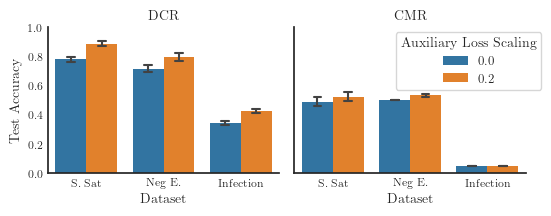

In [80]:
# joined plot
dcr_study['Model'] = 'DCR'
cmr_study['Model'] = 'CMR'
df = pd.concat([dcr_study, cmr_study], axis=0)

width, height = get_size('log', fraction=1)

width = width/2
height = height/1.5
#plot = sns.barplot(data=dcr_study, x='Dataset', y='test_accuracy', hue='entropy_loss_scaling', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5)
g = sns.catplot(data=df, x='Dataset', y='test_accuracy', hue='entropy_loss_scaling', col='Model', palette=palette, capsize=0.2, errorbar="se", errwidth=1.5, kind='bar', height=height, aspect=width/height)
g.set(ylim=(0, 1.0))
#plot.set_title('DCR Ablation Study')
g.set_xlabels('Dataset')
g.set_ylabels('Test Accuracy')

g.set_titles(col_template="{col_name}")
# move legend into the plot
sns.move_legend(g, "upper left", frameon=True, bbox_to_anchor=(0.6, 0.86), title='Auxiliary Loss Scaling')

plt.savefig('both_loss_scaling.pdf', bbox_inches='tight')
